<a href="https://colab.research.google.com/github/amrtariq/EDA_1_Air_Traffic/blob/master/EDA_1_Air_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. Read the Datasets

Import required Libs

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now,read both passangers and departures files downloaded from  https://www.kaggle.com/datasets/parulpandey/us-international-air-traffic-data



In [ ]:
#if Using Colab
departures = pd.read_csv('/content/drive/MyDrive/Capstones Mobadra/EDA_1 Air Traffic/International_Report_Departures.csv')
passangers = pd.read_csv('/content/drive/MyDrive/Capstones Mobadra/EDA_1 Air Traffic/International_Report_Passengers.csv')


#Locally
#departures = pd.read_csv('International_Report_Departures.csv')
#passangers = pd.read_csv('International_Report_Passengers.csv')

# 2. Cleaning the Data

In [ ]:
departures['Year'].value_counts()

2018    39926
2017    38993
2019    38589
2016    37282
2015    35544
2007    35454
2014    33877
2011    33861
2006    33666
2008    33622
2010    33386
2005    33034
2012    32719
2013    32557
2004    32289
2009    31315
2003    30115
1999    28994
2000    28971
1998    28778
1997    27734
2001    27612
2002    27182
1996    26998
1995    26219
1994    25045
1993    23459
1992    22626
1990    20662
1991    20649
2020     9650
Name: Year, dtype: int64

In [ ]:
passangers['Year'].value_counts()

2018    30772
2019    30413
2017    30110
2016    28750
2015    27283
2014    25843
2011    24516
2013    24464
2007    24143
2012    24070
2008    23829
2006    23553
2010    23551
2005    22822
2009    22308
2004    22115
2003    20776
2000    20709
1998    20518
1999    20436
2001    19780
1997    19697
1996    19306
1995    18753
1994    18368
2002    18280
1993    18062
1992    17382
1990    16455
1991    16355
2020     7566
Name: Year, dtype: int64

For this dataset, there isn't actually too much to clean, as most of the values are all filled in, and we will be using most of the columns for at least one part of the data analysis. There are just two minor things to fix with this dataset:
1. sort data
2. remove 2020 as it seems data are missing
3. add nulls at carrier to Missing

In [ ]:
departures = departures.sort_values(by=['Year', 'Month']).reset_index()
departures.drop("index", axis=1, inplace=True)
departures = departures.loc[departures.Year < 2020]

In [ ]:
passangers = passangers.sort_values(by=['Year', 'Month']).reset_index()
passangers.drop("index", axis=1, inplace=True)
passangers = passangers.loc[passangers.Year < 2020]

In [ ]:
departures

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,01/01/1990,1990,1,12478,JFK,22,11032,CUN,148,19983,KEQ,1,Departures,0,6,6
1,01/01/1990,1990,1,10821,BWI,35,11032,CUN,148,19892,ACQ,0,Departures,0,11,11
2,01/01/1990,1990,1,12889,LAS,85,16173,YQR,921,19523,CP,0,Departures,0,12,12
3,01/01/1990,1990,1,11618,EWR,21,10970,CGN,429,19917,5X,1,Departures,0,37,37
4,01/01/1990,1990,1,13930,ORD,41,11032,CUN,148,19684,INQ,1,Departures,0,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921153,12/01/2019,2019,12,12953,LGA,22,16217,YUL,941,21611,KV,0,Departures,462,0,462
921154,12/01/2019,2019,12,12953,LGA,22,16271,YYZ,936,19531,AC,0,Departures,467,0,467
921155,12/01/2019,2019,12,13204,MCO,33,14286,PTY,162,19770,CM,0,Departures,584,0,584
921156,12/01/2019,2019,12,11618,EWR,22,16215,YTZ,936,21226,PD,0,Departures,659,0,659


In [ ]:
passangers

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,01/01/1990,1990,1,11042,CLE,44,11032,CUN,148,19892,ACQ,0,Passengers,0,796,796
1,01/01/1990,1990,1,12264,IAD,38,14739,SDQ,224,20312,TZ,1,Passengers,0,191,191
2,01/01/1990,1990,1,11697,FLL,33,11760,FRA,429,20120,DFQ,0,Passengers,0,1258,1258
3,01/01/1990,1990,1,11252,DAB,33,16217,YUL,941,19506,ND,0,Passengers,0,237,237
4,01/01/1990,1990,1,14107,PHX,81,11032,CUN,148,19892,ACQ,0,Passengers,0,513,513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673414,12/01/2019,2019,12,12478,JFK,22,12966,LGW,493,21924,DI,0,Passengers,55680,0,55680
673415,12/01/2019,2019,12,11298,DFW,74,11032,CUN,148,19805,AA,1,Passengers,58982,0,58982
673416,12/01/2019,2019,12,12478,JFK,22,12972,LHR,493,19805,AA,1,Passengers,60058,0,60058
673417,12/01/2019,2019,12,12478,JFK,22,10920,CDG,427,19532,AF,0,Passengers,75574,0,75574


In [ ]:
passangers.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [ ]:
passangers['carrier'].value_counts()
passangers.fillna('Missing')

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,01/01/1990,1990,1,11042,CLE,44,11032,CUN,148,19892,ACQ,0,Passengers,0,796,796
1,01/01/1990,1990,1,12264,IAD,38,14739,SDQ,224,20312,TZ,1,Passengers,0,191,191
2,01/01/1990,1990,1,11697,FLL,33,11760,FRA,429,20120,DFQ,0,Passengers,0,1258,1258
3,01/01/1990,1990,1,11252,DAB,33,16217,YUL,941,19506,ND,0,Passengers,0,237,237
4,01/01/1990,1990,1,14107,PHX,81,11032,CUN,148,19892,ACQ,0,Passengers,0,513,513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673414,12/01/2019,2019,12,12478,JFK,22,12966,LGW,493,21924,DI,0,Passengers,55680,0,55680
673415,12/01/2019,2019,12,11298,DFW,74,11032,CUN,148,19805,AA,1,Passengers,58982,0,58982
673416,12/01/2019,2019,12,12478,JFK,22,12972,LHR,493,19805,AA,1,Passengers,60058,0,60058
673417,12/01/2019,2019,12,12478,JFK,22,10920,CDG,427,19532,AF,0,Passengers,75574,0,75574


In [ ]:
departures.isna().sum()
departures.fillna('Missing')

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,01/01/1990,1990,1,12478,JFK,22,11032,CUN,148,19983,KEQ,1,Departures,0,6,6
1,01/01/1990,1990,1,10821,BWI,35,11032,CUN,148,19892,ACQ,0,Departures,0,11,11
2,01/01/1990,1990,1,12889,LAS,85,16173,YQR,921,19523,CP,0,Departures,0,12,12
3,01/01/1990,1990,1,11618,EWR,21,10970,CGN,429,19917,5X,1,Departures,0,37,37
4,01/01/1990,1990,1,13930,ORD,41,11032,CUN,148,19684,INQ,1,Departures,0,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921153,12/01/2019,2019,12,12953,LGA,22,16217,YUL,941,21611,KV,0,Departures,462,0,462
921154,12/01/2019,2019,12,12953,LGA,22,16271,YYZ,936,19531,AC,0,Departures,467,0,467
921155,12/01/2019,2019,12,13204,MCO,33,14286,PTY,162,19770,CM,0,Departures,584,0,584
921156,12/01/2019,2019,12,11618,EWR,22,16215,YTZ,936,21226,PD,0,Departures,659,0,659


# 3. Exploratory Data Analysis

First, we will analyze the total number of **departures per year** to determine if there are any trends in the number of flights every year.

In [ ]:
departures_by_year = departures.groupby('Year')['Total'].sum().reset_index()
departures_by_year1 = departures_by_year.set_index("Year")
departures_by_year1

,Total
Year,
1990,683399
1991,701843
1992,784967
1993,820376
1994,844760
1995,913350
1996,943039
1997,983723
1998,1082878


In [ ]:
passangers_by_year = passangers.groupby('Year')['Total'].sum().reset_index()
passangers_by_year1 = passangers_by_year.set_index("Year")
passangers_by_year1

,Total
Year,
1990,84425428
1991,81771514
1992,89642833
1993,94140075
1994,98550584
1995,105521802
1996,113248651
1997,120323779
1998,125299971


graphing data

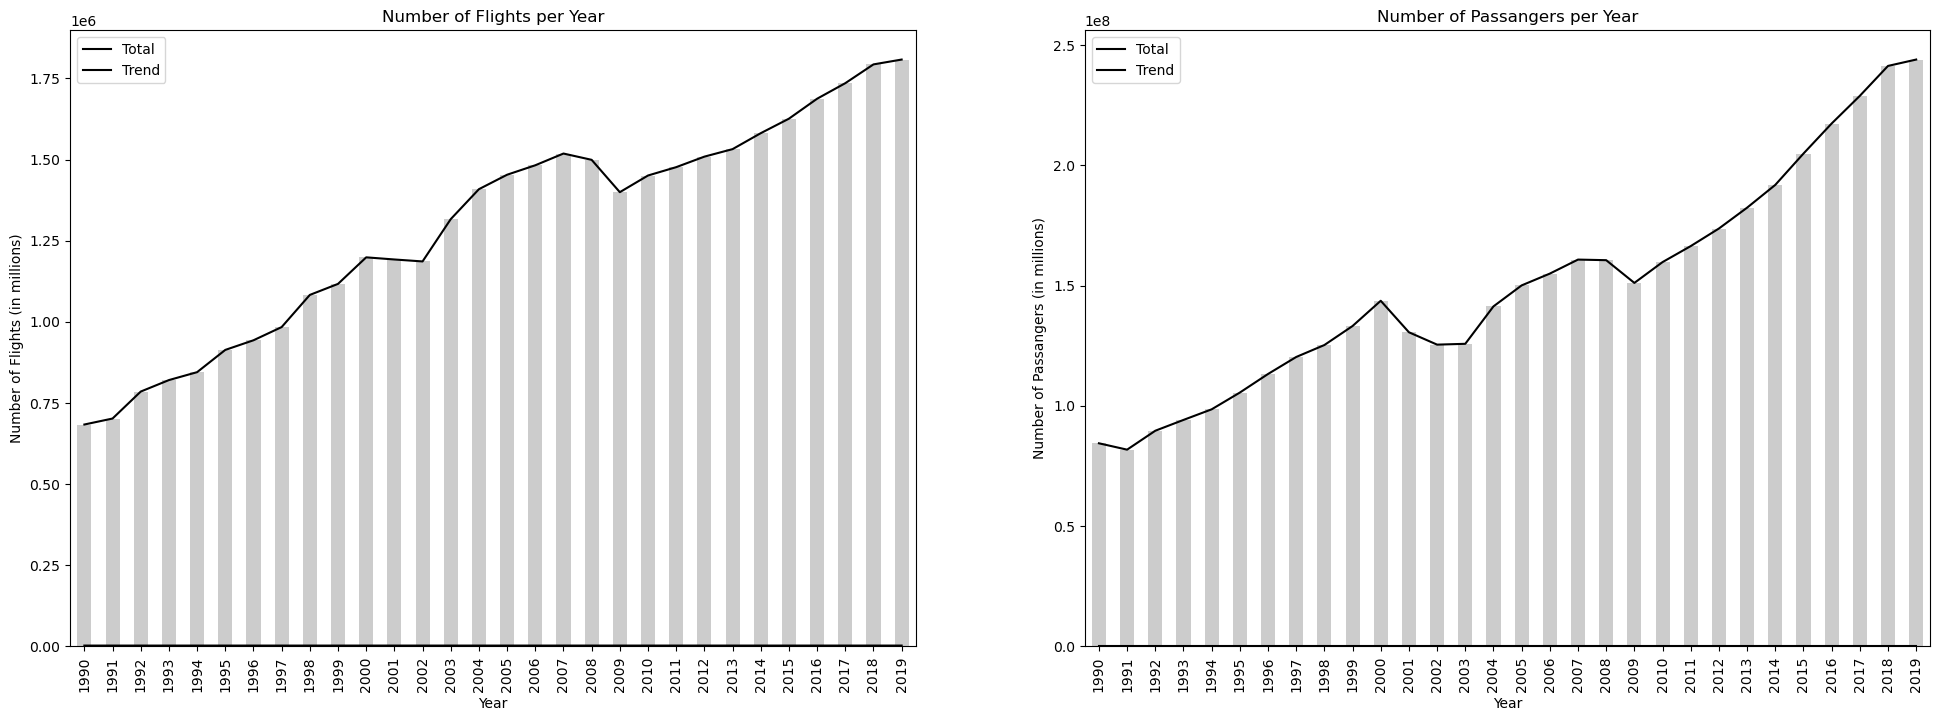

In [ ]:
fig, (ax,ax2) = plt.subplots(1,2,figsize=(24,8))
departures_by_year.plot(kind="line", color = "black", ax=ax, title = "Number of Flights per Year", xlabel = "Year", ylabel = "Number of Flights (in millions)")
departures_by_year1.plot(kind="bar", color="grey", width = 0.5, alpha=0.4, ax=ax)
#print(handles[1])
handles, lables = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
lables = [lables[1], "Trend"]
ax.legend(handles, lables)

passangers_by_year.plot(kind="line", color = "black", ax=ax2, title = "Number of Passangers per Year", xlabel = "Year", ylabel = "Number of Passangers (in millions)")
passangers_by_year1.plot(kind="bar", color="grey", width = 0.5, alpha=0.4, ax=ax2)
#print(handles[1])
handles, lables = ax2.get_legend_handles_labels()
handles = [handles[1], handles[0]]
lables = [lables[1], "Trend"]
ax2.legend(handles, lables)

plt.show()

In [ ]:
departures_by_month = departures.groupby(["Year", "Month"])["Total"].sum().reset_index()
departures_by_month = departures_by_month.pivot(index="Year", columns="Month", values="Total")

passangers_by_month = passangers.groupby(["Year", "Month"])["Total"].sum().reset_index()
passangers_by_month = passangers_by_month.pivot(index="Year", columns="Month", values="Total")

In [ ]:
departures_by_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1990,54129,49391,58542,54195,54863,56356,61969,62108,57527,57460,57701,59158
1991,56772,49264,55963,54740,56996,59295,64308,65362,59891,60152,57766,61334
1992,61328,58009,63137,63179,64976,66677,72168,71177,66004,66999,63749,67564
1993,68215,61397,67805,66408,68236,68497,74418,73869,67945,68195,65177,70214
1994,69881,62279,71217,69407,69322,69946,74578,74454,69667,71128,68668,74213
1995,74630,66804,75454,73870,75148,76822,82107,81822,75628,76230,74832,80003
1996,78656,74084,80511,76600,80511,78457,82919,84316,76339,77153,74512,78981
1997,79147,72401,81925,78799,81766,82443,87708,88596,81221,82823,80875,86019
1998,88877,81360,90816,89769,91828,91539,98336,97337,83980,90068,86597,92371


In [ ]:
departures_by_season = pd.DataFrame()
departures_by_season["Winter"] = departures_by_month[12] + departures_by_month[1] + departures_by_month[2]
departures_by_season["Spring"] = departures_by_month[3] + departures_by_month[4] + departures_by_month[5]
departures_by_season["Summer"] = departures_by_month[6] + departures_by_month[7] + departures_by_month[8]
departures_by_season["Autumn"] = departures_by_month[9] + departures_by_month[10] + departures_by_month[11]
season_colors=["#75aad8", "#ff89ff", "#ffd900", "#ff7400"]
departures_by_season_sum = departures_by_season.sum(axis=0)

passangers_by_season = pd.DataFrame()
passangers_by_season["Winter"] = passangers_by_month[12] + passangers_by_month[1] + passangers_by_month[2]
passangers_by_season["Spring"] = passangers_by_month[3] + passangers_by_month[4] + passangers_by_month[5]
passangers_by_season["Summer"] = passangers_by_month[6] + passangers_by_month[7] + passangers_by_month[8]
passangers_by_season["Autumn"] = passangers_by_month[9] + passangers_by_month[10] + passangers_by_month[11]
season_colors=["#75aad8", "#ff89ff", "#ffd900", "#ff7400"]
passangers_by_season_sum = passangers_by_season.sum(axis=0)

departures_by_season

,Winter,Spring,Summer,Autumn
Year,,,,
1990,162678,167600,180433,172688
1991,167370,167699,188965,177809
1992,186901,191292,210022,196752
1993,199826,202449,216784,201317
1994,206373,209946,218978,209463
1995,221437,224472,240751,226690
1996,231721,237622,245692,228004
1997,237567,242490,258747,244919
1998,262608,272413,287212,260645


<Axes: title={'center': 'Total Passangers per Season'}, xlabel='Season', ylabel='Number of Passangers (in tens of millions)'>

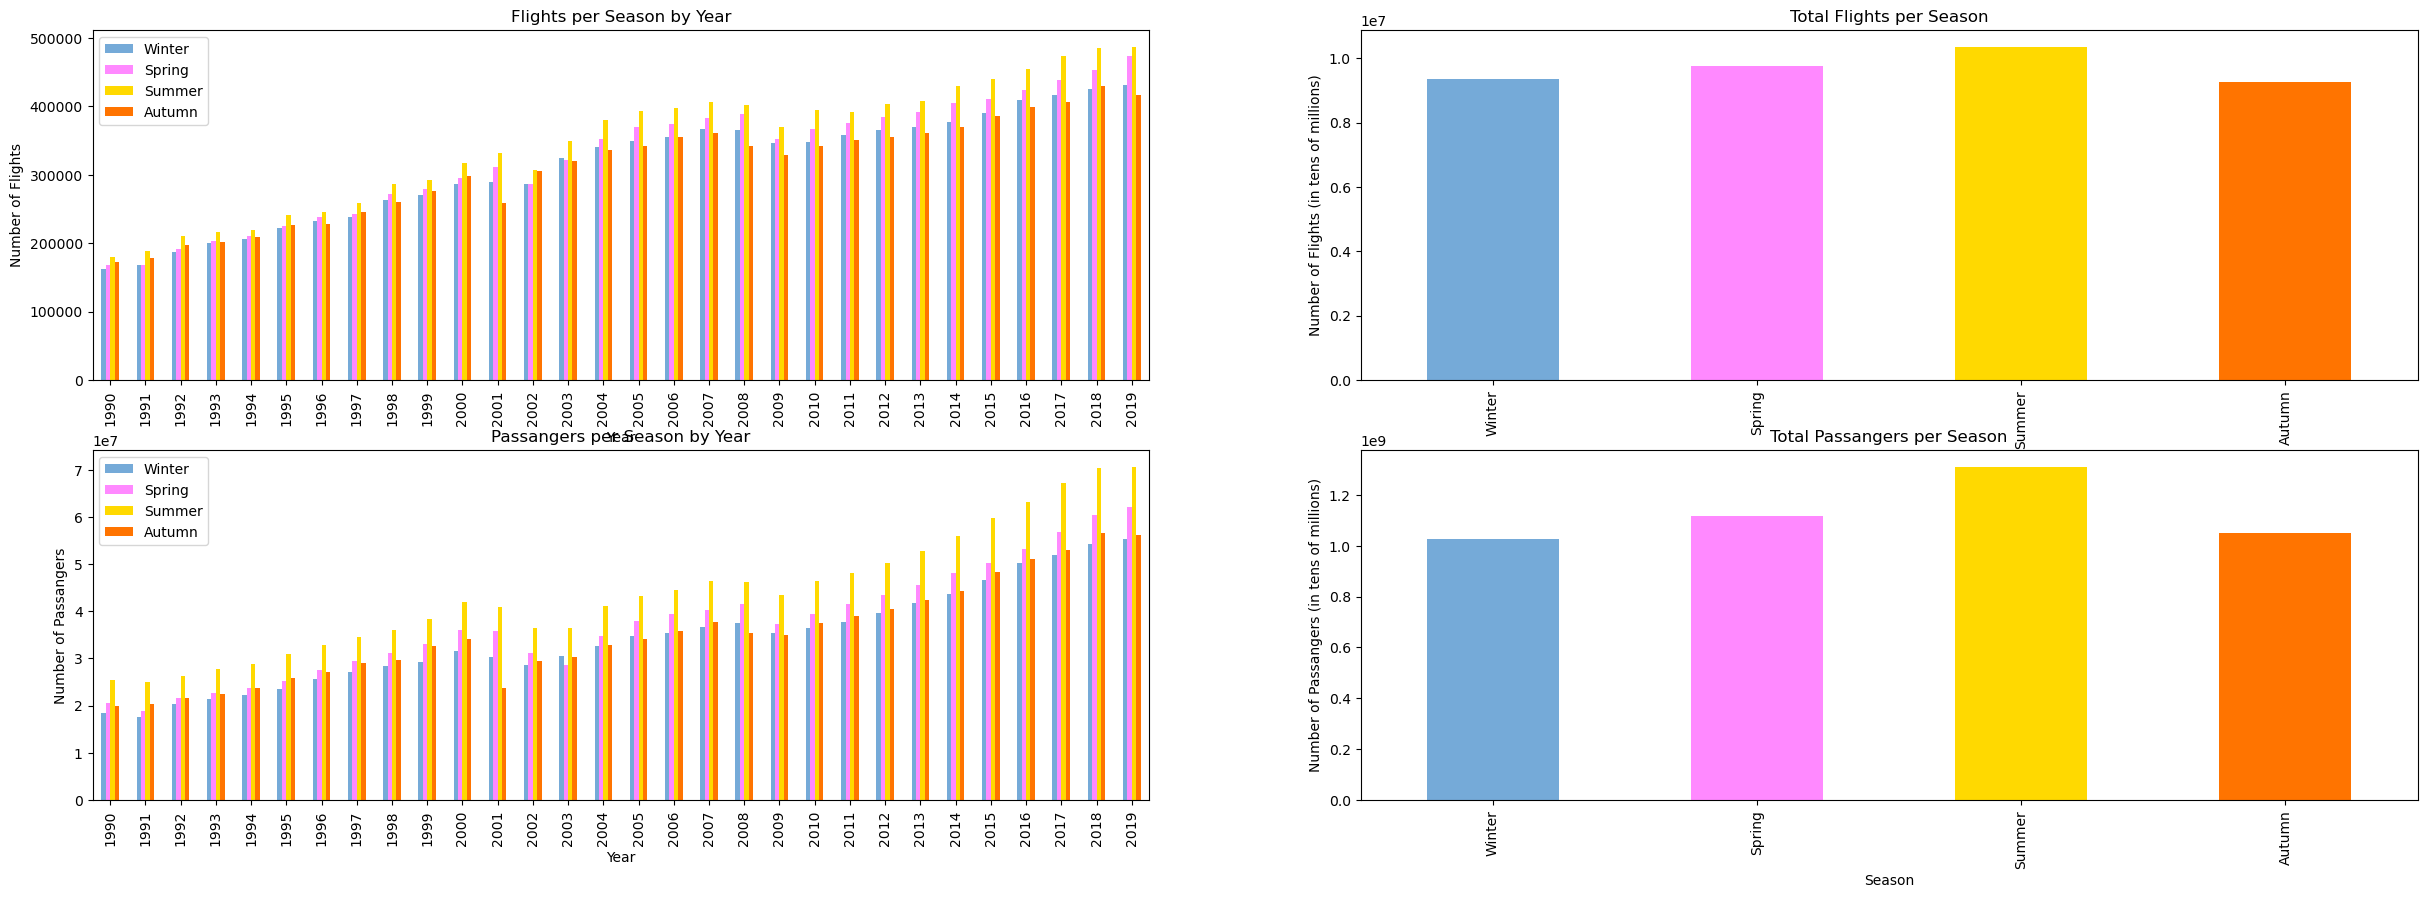

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(30,10))
departures_by_season.plot(kind="bar", stacked = False, color = season_colors, ax=ax[0][0], title="Flights per Season by Year", xlabel = "Year", ylabel = "Number of Flights")
departures_by_season_sum.plot(kind="bar", color = season_colors, ax=ax[0][1], title="Total Flights per Season", xlabel = "Season", ylabel = "Number of Flights (in tens of millions)")
passangers_by_season.plot(kind="bar", stacked = False, color = season_colors, ax=ax[1][0], title="Passangers per Season by Year", xlabel = "Year", ylabel = "Number of Passangers")
passangers_by_season_sum.plot(kind="bar", color = season_colors, ax=ax[1][1], title="Total Passangers per Season", xlabel = "Season", ylabel = "Number of Passangers (in tens of millions)")

([<matplotlib.patches.Wedge at 0x1dfe6628350>,
 [Text(-1.0998333172760961, -0.01914873910883678, 'winter'),
  Text(-0.06419872306768326, -1.0981250037935022, 'spring'),
  Text(1.0976768166863127, 0.0714535241216498, 'summer'),
  Text(-0.1543773782836642, 1.089113228766533, 'autumn')],
 [Text(-0.5999090821505978, -0.010444766786638244, '22.8%'),
  Text(-0.03501748530964541, -0.5989772747964557, '24.8%'),
  Text(0.5987328091016251, 0.038974649520899886, '29.1%'),
  Text(-0.08420584270018047, 0.5940617611453817, '23.3%')])

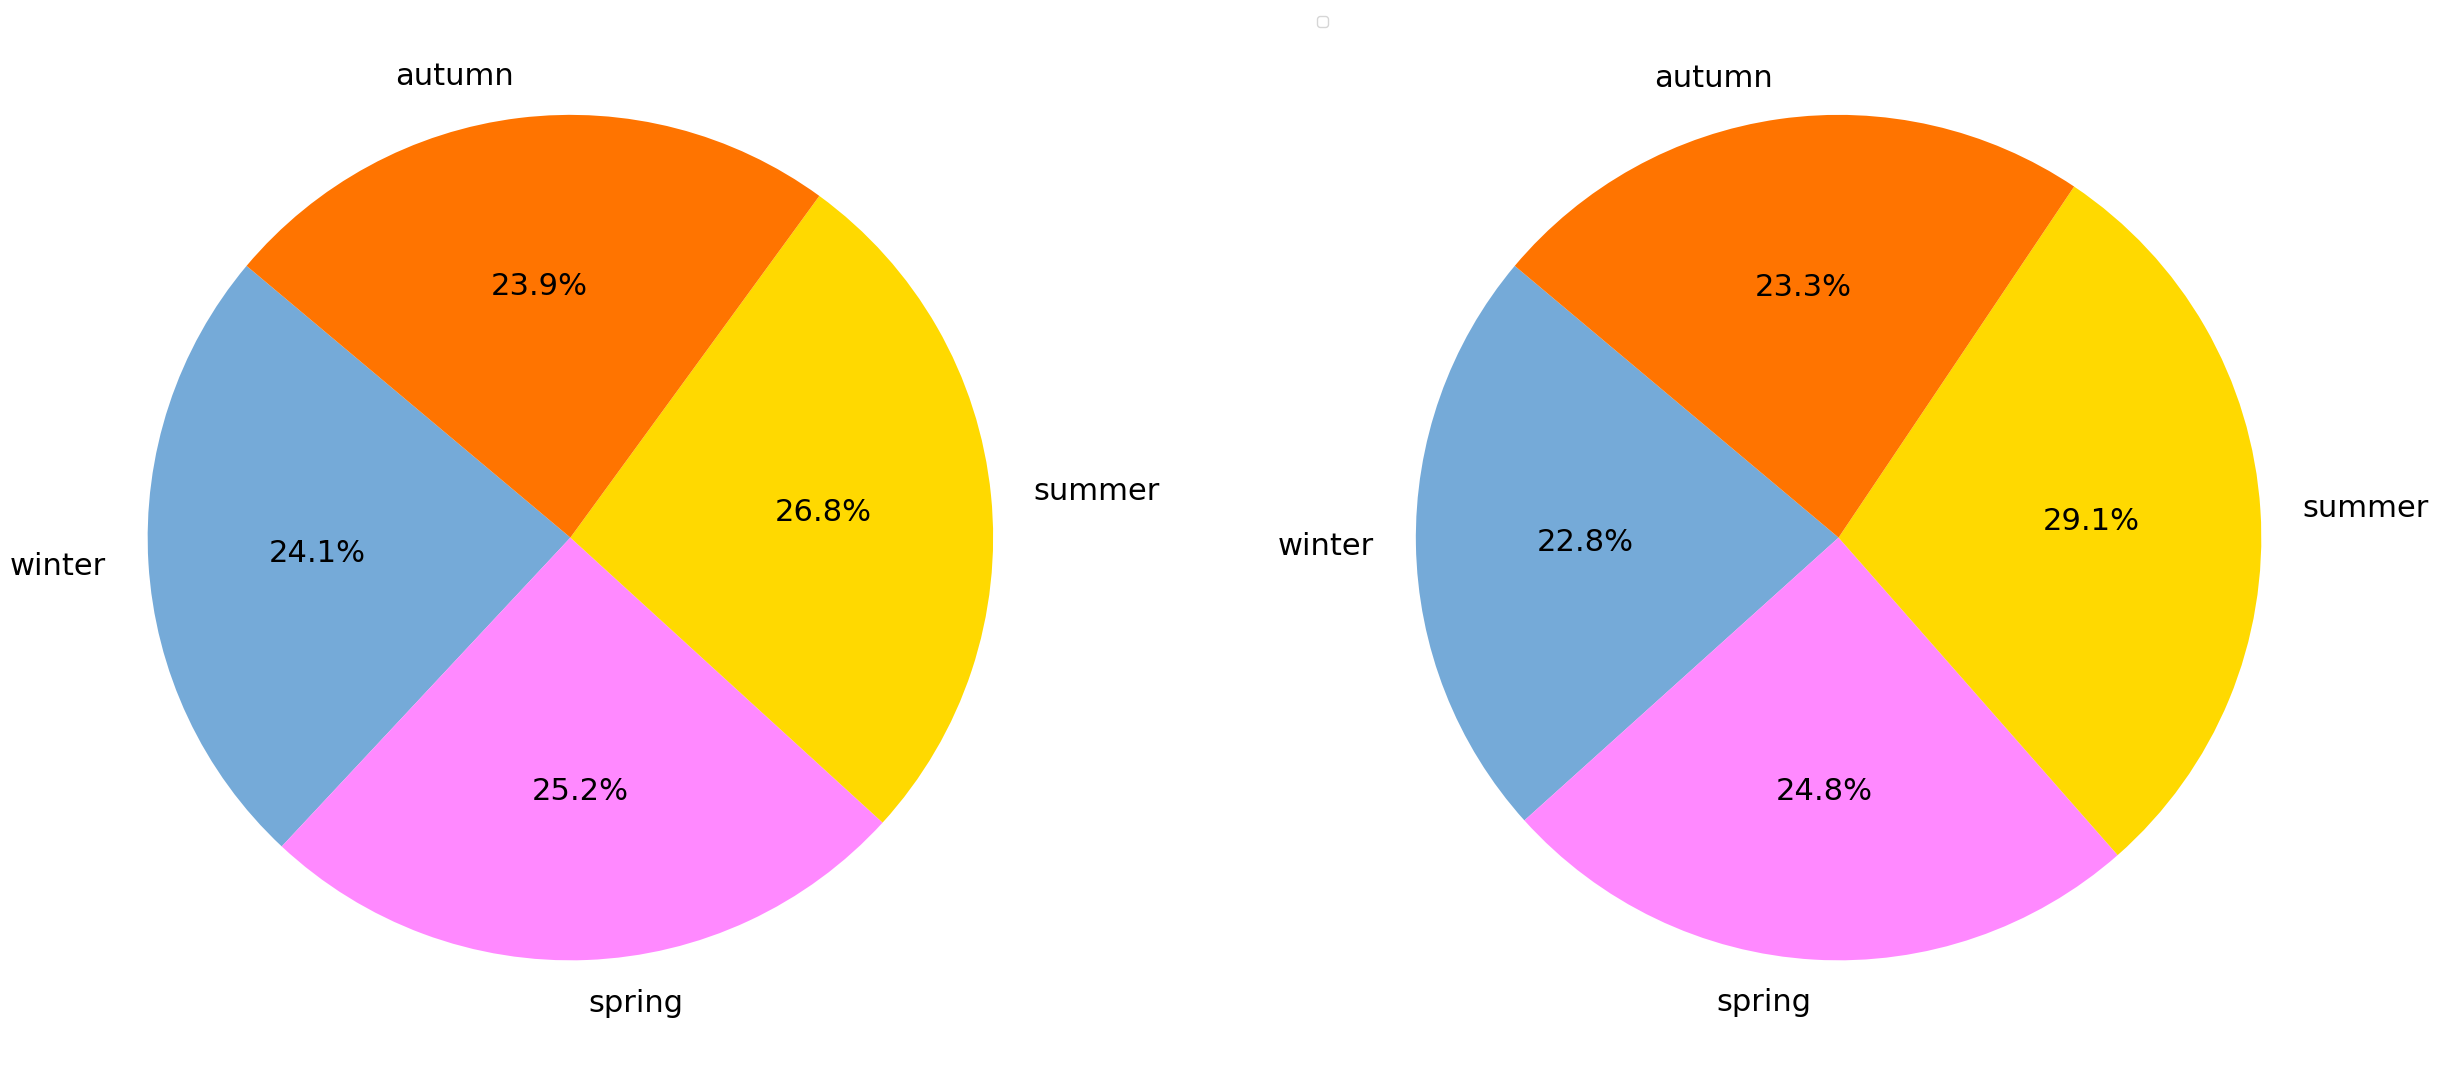

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,30))
plt.legend(labels, loc="upper left")
ax[0].pie(departures_by_season_sum, colors=season_colors, textprops={'fontsize':22}, labels=['winter','spring','summer','autumn'], autopct='%1.1f%%', startangle=140)
plt.legend(labels, loc="upper left")
ax[1].pie(passangers_by_season_sum, colors=season_colors, textprops={'fontsize':22}, labels=['winter','spring','summer','autumn'], autopct='%1.1f%%', startangle=140)


#departures_by_season_sum.pie(color = season_colors, ax=ax[0], title="Flights per Season by Year", xlabel = "Year", ylabel = "Number of Flights")
#departures_by_season_sum.plot(color = season_colors, ax=ax[1], title="Total Flights per Season", xlabel = "Season", ylabel = "Number of Flights (in tens of millions)")

In [ ]:
departures_by_usairport = departures.groupby("usg_apt")["Total"].sum().reset_index()
departures_by_usairport = departures_by_usairport.sort_values(by="Total", ascending = False).reset_index(drop=True)
busiest_usairports = departures_by_usairport.iloc[:10]
busiest_usairports

,usg_apt,Total
0,MIA,4975460
1,JFK,3746842
2,LAX,2987603
3,ORD,2346784
4,EWR,2022533
5,IAH,1994587
6,ATL,1578903
7,DFW,1371074
8,SFO,1336187
9,SJU,1193352


[]

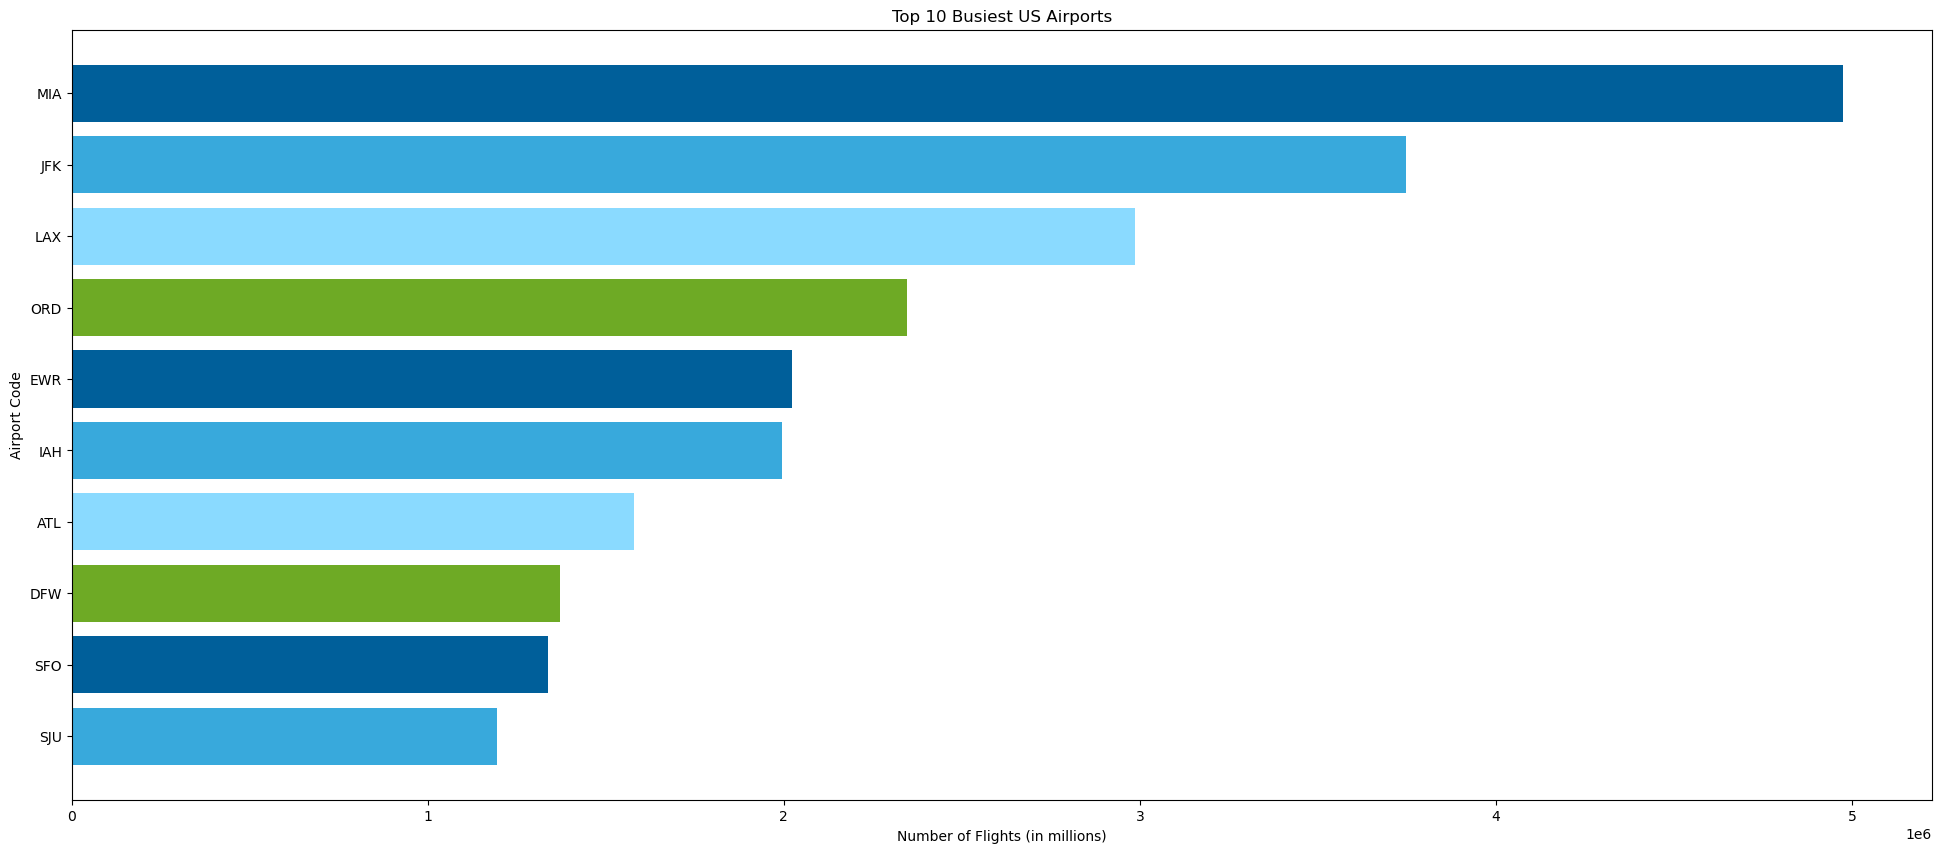

In [ ]:
top10_airports = departures_by_usairport.iloc[:10]

fig, ax = plt.subplots(figsize=(24,10))
ax.barh(y=top10_airports.usg_apt, width=top10_airports.Total, color=["#005F9A", "#38A9DC", "#8ADAFF", "#6EAA25"], label = busiest_usairports['usg_apt'])
ax.invert_yaxis()
plt.title("Top 10 Busiest US Airports")
plt.xlabel("Number of Flights (in millions)")
plt.ylabel("Airport Code")

plt.plot()

In [ ]:
routes = departures.groupby(["usg_apt", "fg_apt"])["Total"].sum().reset_index()
routes = routes = routes.sort_values(by="Total", ascending = False).reset_index(drop=True)
routes_top20 = routes.iloc[:20]
routes_top20

,usg_apt,fg_apt,Total
0,LGA,YYZ,405767
1,JFK,LHR,380578
2,ORD,YYZ,379869
3,SEA,YVR,323129
4,MIA,NAS,282905
5,MIA,BOG,273751
6,LAX,MEX,269477
7,SJU,EIS,256695
8,LAX,YVR,233656
9,IAH,MEX,229860


In [ ]:
departures_by_airline = departures.groupby("carrier")["Total"].sum().reset_index()
departures_by_airline = departures_by_airline.sort_values(by="Total", ascending = False).reset_index(drop=True)
busiest_airlines = departures_by_airline.iloc[:10]


busiest_airlines

,carrier,Total
0,AA,4379878
1,UA,2512833
2,DL,2453524
3,AC,1767778
4,CO,1389124
5,US,899661
6,NW,859249
7,QK,851244
8,BA,793786
9,MQ,622720


[]

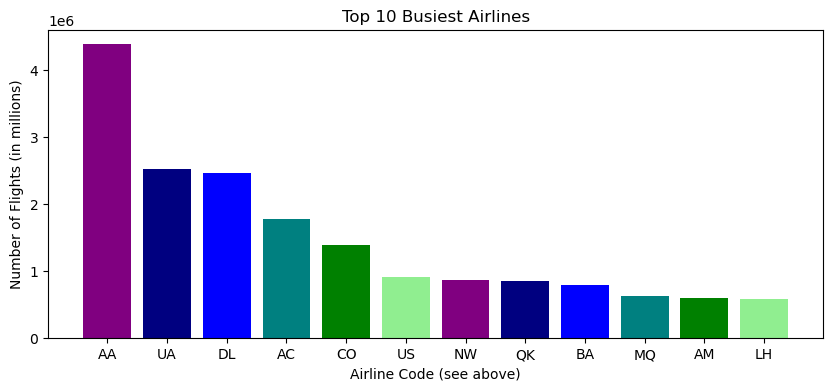

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x=busiest_airlines['carrier'], height=busiest_airlines.Total, color = ["purple", "navy", "blue", "teal", "green", "lightgreen"])
plt.title("Top 10 Busiest Airlines")
plt.ylabel("Number of Flights (in millions)")
plt.xlabel("Airline Code (see above)")

plt.plot()

In [ ]:
top_10_airlines = busiest_airlines.iloc[0:10]

airlines_by_airport = departures.groupby(["usg_apt", "carrier"])["Total"].sum().reset_index()
airlines_by_airport = airlines_by_airport.loc[airlines_by_airport["usg_apt"].isin(["MIA", "JFK", "LAX", "ORD", "EWR", "IAH", "ATL", "DFW", "SFO"])]
airlines_by_airport = airlines_by_airport.loc[airlines_by_airport["carrier"].isin(top_10_airlines["carrier"])]

airlines_by_airport = airlines_by_airport.pivot(index="usg_apt", columns="carrier", values="Total")

airlines_by_airport

carrier,AA,AC,BA,CO,DL,MQ,NW,QK,UA,US
usg_apt,,,,,,,,,,
ATL,15.0,26113.0,22128.0,41.0,1049503.0,1.0,1500.0,35568.0,10.0,6.0
DFW,908936.0,13747.0,21584.0,639.0,12601.0,151427.0,5.0,12782.0,48.0,2.0
EWR,5105.0,126475.0,42747.0,595554.0,9932.0,11.0,5286.0,52953.0,365917.0,14.0
IAH,531.0,34805.0,31949.0,688759.0,44.0,56.0,15.0,53731.0,350884.0,4.0
JFK,511373.0,8539.0,184864.0,266.0,498112.0,88476.0,14474.0,7239.0,58704.0,3054.0
LAX,121254.0,218173.0,50798.0,1908.0,156339.0,NaN,26334.0,2783.0,185916.0,2.0
MIA,1821021.0,66057.0,43359.0,6060.0,14288.0,118622.0,11564.0,NaN,61984.0,77.0
ORD,465336.0,175032.0,45207.0,97.0,1205.0,101415.0,5891.0,18463.0,475930.0,3.0
SFO,35.0,150414.0,38966.0,428.0,8386.0,NaN,15726.0,7059.0,391207.0,NaN


<Axes: title={'center': 'Most Common Airlines & Most Common Airports'}, xlabel='Airport', ylabel='Number of Flights (in millions)'>

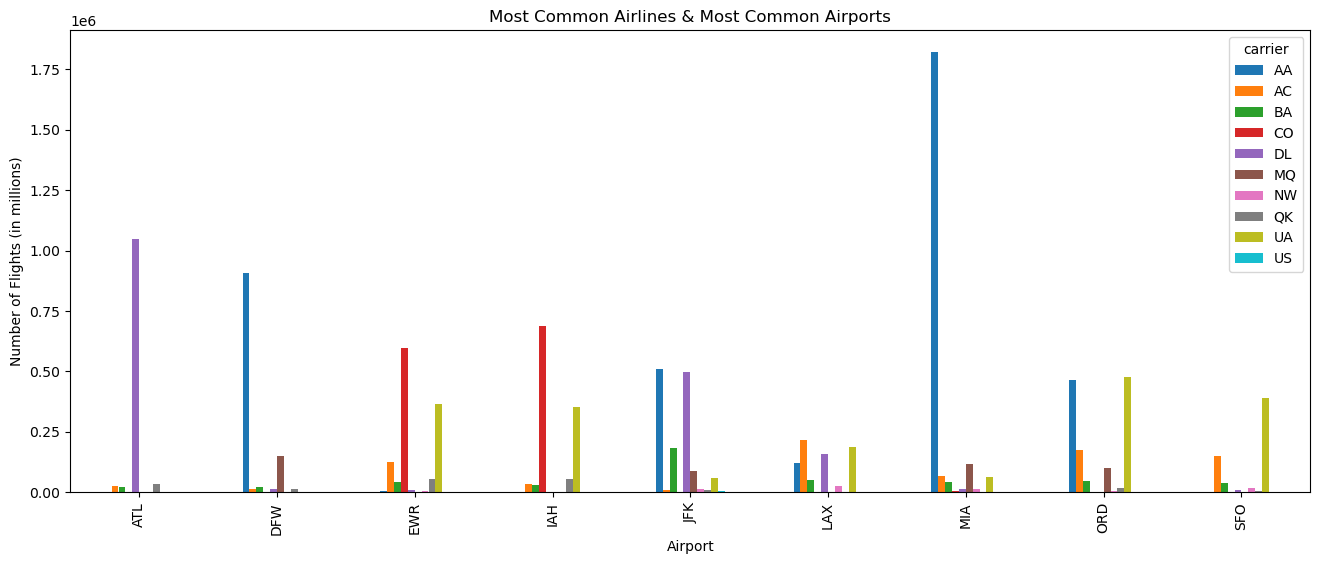

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
airlines_by_airport.plot(kind="bar", stacked = False, ax=ax, title="Most Common Airlines & Most Common Airports", xlabel = "Airport", ylabel = "Number of Flights (in millions)")

[]

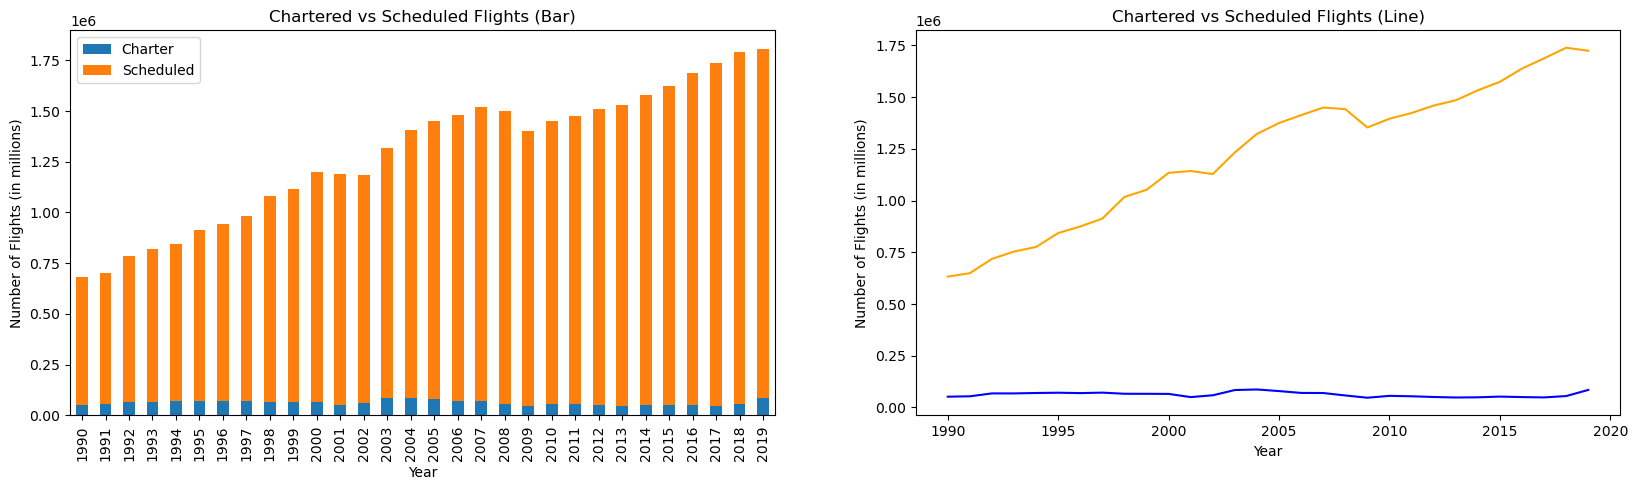

In [ ]:
flight_type = departures.groupby("Year")[["Charter", "Scheduled"]].sum().reset_index()
flight_type = flight_type.set_index("Year")
chartered=flight_type["Charter"]
scheduled=flight_type["Scheduled"]

fig, ax = plt.subplots(1, 2, figsize=(20,5))

flight_type.plot(kind="bar", stacked = True, ax=ax[0], title="Chartered vs Scheduled Flights (Bar)", xlabel = "Year", ylabel = "Number of Flights (in millions)")
chartered.plot(kind="line", color = "blue", ax=ax[1], title = "Chartered vs Scheduled Flights (Line)", xlabel = "Year", ylabel = "Number of Flights (in millions)")
scheduled.plot(kind="line", color = "orange", ax=ax[1])

plt.plot()